In [2]:
import random
import math
import matplotlib.pyplot as plt

# Function to sample from a normal distribution using Box-Muller
def sample_normal(mu, sigma):
    u1 = random.random()
    u2 = random.random()
    z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    return mu + sigma * z

# Gibbs Sampler for 2D Gaussian
def gibbs_sampling_2d(mu1, mu2, sigma1, sigma2, rho, num_samples, burn_in=100):
    samples = []

    # Initial values
    x1 = 0.0
    x2 = 0.0

    # Precompute conditional variances
    sigma1_cond = math.sqrt((1 - rho**2) * sigma1**2)
    sigma2_cond = math.sqrt((1 - rho**2) * sigma2**2)

    for i in range(num_samples + burn_in):
        # Sample x1 | x2
        mu1_cond = mu1 + rho * (sigma1 / sigma2) * (x2 - mu2)
        x1 = sample_normal(mu1_cond, sigma1_cond)

        # Sample x2 | x1
        mu2_cond = mu2 + rho * (sigma2 / sigma1) * (x1 - mu1)
        x2 = sample_normal(mu2_cond, sigma2_cond)

        if i >= burn_in:
            samples.append((x1, x2))

    return samples


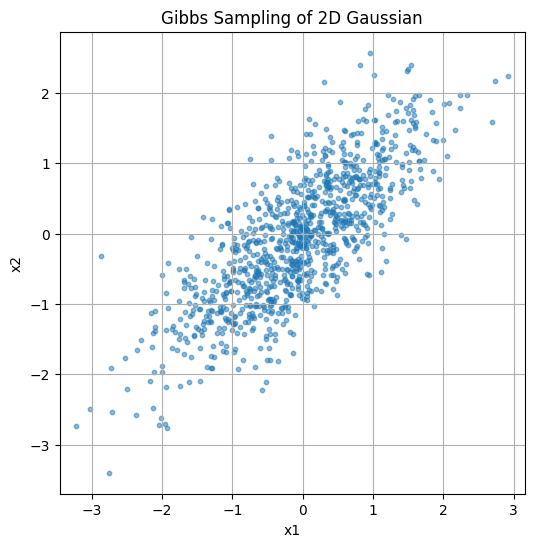

In [3]:
# Parameters
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1
rho = 0.8
num_samples = 1000

samples = gibbs_sampling_2d(mu1, mu2, sigma1, sigma2, rho, num_samples)

# Plot
x_vals, y_vals = zip(*samples)
plt.figure(figsize=(6,6))
plt.scatter(x_vals, y_vals, alpha=0.5, s=10)
plt.title("Gibbs Sampling of 2D Gaussian")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid(True)
plt.show()
